# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from mpl_toolkits.mplot3d import Axes3D

# Data loading

In [3]:

def load_data():
    df = pd.read_csv("cleaned.csv")  
    # print("Columns in dataset:", df.columns.tolist())
    x=df.iloc[:,:-1].values  
    y=df.iloc[:,-1].values  
    
    scaler=StandardScaler()
    x=scaler.fit_transform(x)    
    return train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

X_train,X_test,y_train,y_test=load_data()

# SVM initialization

In [4]:

class_weights=compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict={i: class_weights[i] for i in range(len(class_weights))}

svm_ova=SVC(kernel='linear',C=0.1,decision_function_shape='ovr',class_weight=class_weight_dict,probability=True)
svm_ova.fit(X_train,y_train)
y_pred=svm_ova.predict(X_test)

# Output and plots

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      8000
           1       0.72      0.89      0.80      3512
           2       0.50      0.70      0.59      3512

    accuracy                           0.70     15024
   macro avg       0.70      0.74      0.70     15024
weighted avg       0.75      0.70      0.71     15024



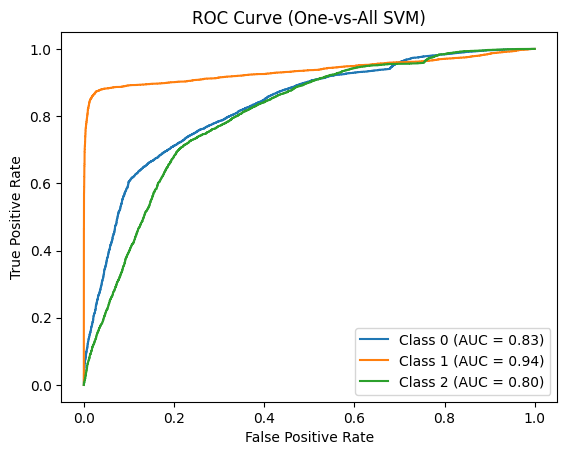

In [5]:
print(classification_report(y_test,y_pred))

y_test_bin=label_binarize(y_test, classes=[0,1,2])
y_score=svm_ova.decision_function(X_test)
plt.figure()
for i in range(3):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_score[:,i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-All SVM)")
plt.legend()
plt.show()


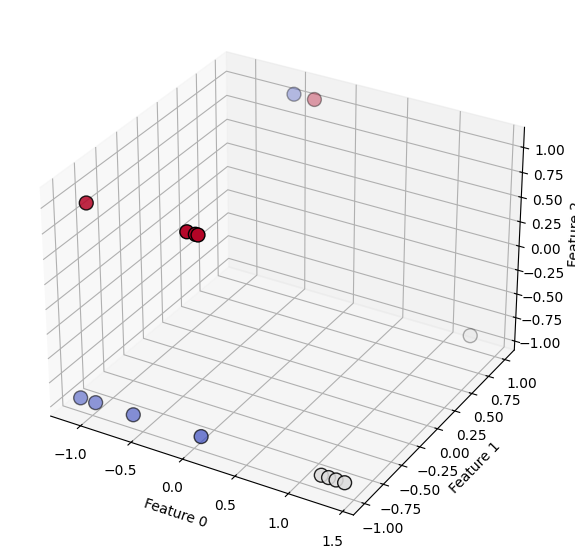

In [6]:

def plot_3d_hyperplanes():
    fig=plt.figure(figsize=(10,7))
    ax=fig.add_subplot(111, projection='3d')
    feature_1,feature_2,feature_3=0,1,2  
    
    correct_indices=(y_train==svm_ova.predict(X_train))
    X_correct=X_train[correct_indices]
    y_correct=y_train[correct_indices]
    
    sampled_indices = []
    for i in range(3):
        class_indices = np.where(y_correct == i)[0]
        sampled_indices.extend(np.random.choice(class_indices, min(5, len(class_indices)), replace=False))
    X_sample = X_correct[sampled_indices]
    y_sample = y_correct[sampled_indices]
    
    ax.scatter(X_sample[:, feature_1], X_sample[:, feature_2], X_sample[:, feature_3], c=y_sample, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    ax.set_xlabel(f"Feature {feature_1}")
    ax.set_ylabel(f"Feature {feature_2}")
    ax.set_zlabel(f"Feature {feature_3}")
    plt.show()

plot_3d_hyperplanes()

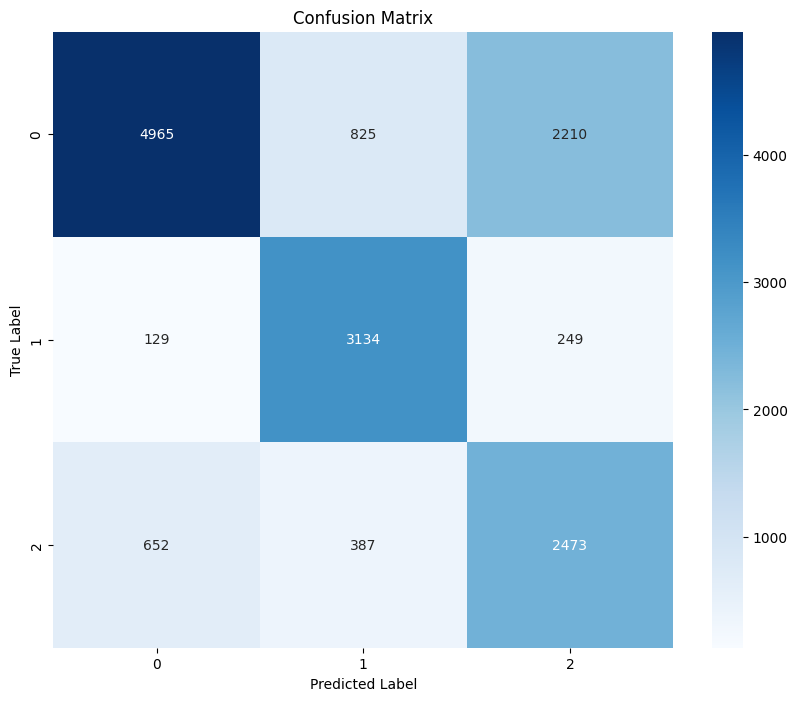

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
